# NFL Draft Analysis 

#### Holden Svacha
#### 12/2/2024

## Background and Motivation

**My project is based around the NFL draft, specifically positions selected and how they have changed throughout the years. I took interest in this topic since a lot of the focus nowadays in the NFL seems to be around the draft and how well teams draft. My goal is to learn which positions are selected the highest and how each position might've changed in where they were selected throughout the years.**

## Methodology

_Unpack our NFL Data which we got from Kaggle, 'NFL Draft 1985-2015' by Ulrik Thyge Pedersen accessed on 12/2/2024._

In [95]:
import pandas as pd
draft = pd.read_csv('nfl_draft.csv')
draft.head()

,column_a,player_id,year,rnd,pick,tm,player,hof,pos,position_standard,...,rush_att,rush_yds,rush_tds,rec,rec_yds,rec_tds,tkl,def_int,sk,college_univ
0,2015Jameis Winston,WinsJa00,2015,1,1,TAM,Jameis Winston,No,QB,QB,...,86.0,311.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,Florida St.
1,2015Marcus Mariota,MariMa01,2015,1,2,TEN,Marcus Mariota,No,QB,QB,...,79.0,516.0,4.0,1.0,41.0,1.0,NaN,NaN,NaN,Oregon
2,2015Dante Fowler,FowlDa00,2015,1,3,JAX,Dante Fowler,No,OLB,LB,...,NaN,NaN,NaN,NaN,NaN,NaN,16.0,NaN,2.5,Florida
3,2015Amari Cooper,CoopAm00,2015,1,4,OAK,Amari Cooper,No,WR,WR,...,3.0,-3.0,0.0,134.0,1970.0,9.0,NaN,NaN,NaN,Alabama
4,2015Brandon Scherff,ScheBr00,2015,1,5,WAS,Brandon Scherff,No,T,T,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Iowa


_The four variables we will be using in this specific dataset are "rnd" and "pick", which represent the round and pick the respective player was chosen, "position_standard" which represents the position they were selected as during the draft, and "year" which represents year._



_We will make a new dataset with only these variables._

In [98]:
draft_stats = draft[["year", "rnd", "pick", "position_standard"]]

_Now we will use the Year and Pick variables to make a violin plot using Seaborns plot functions._

Text(0, 0.5, 'Position')

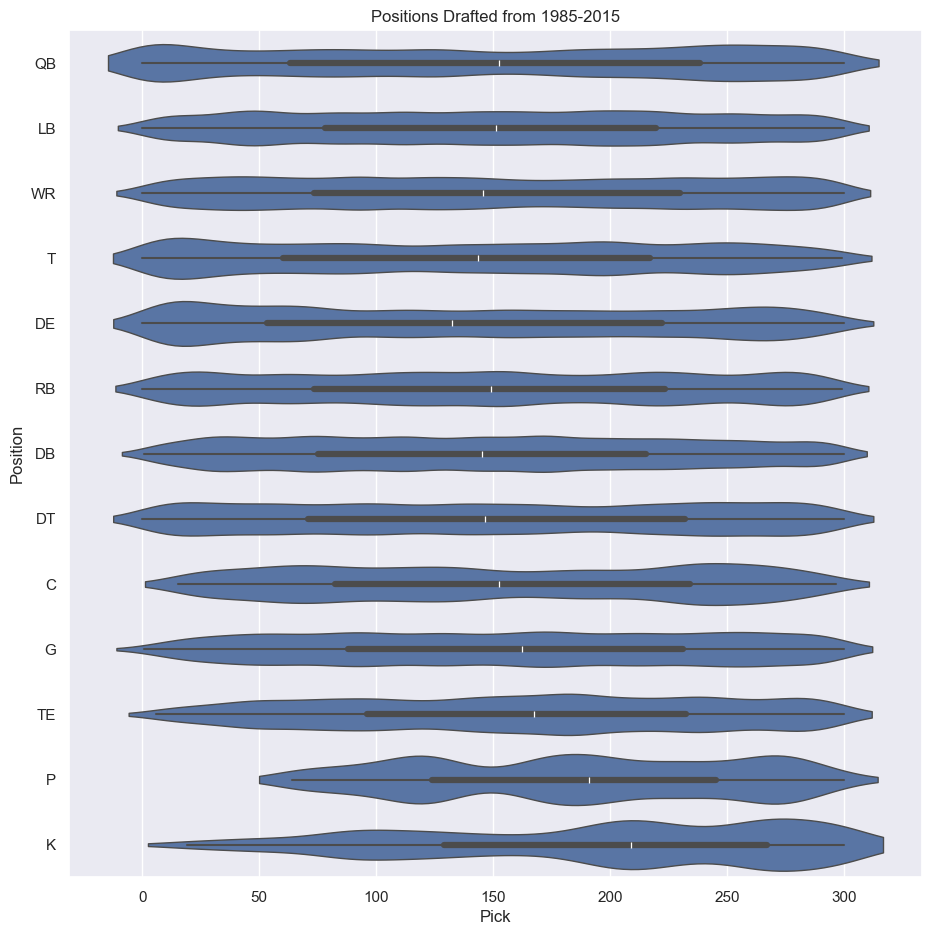

In [214]:
import seaborn as sns

#Drop Long Snapper since it has no data
draft_stats = draft_stats.drop(draft_stats[draft_stats['position_standard'] == 'LS'].index)

#Drop Fullback since it doesn't have enough data
draft_stats = draft_stats.drop(draft_stats[draft_stats['position_standard'] == 'FB'].index)

draft_stats['normalized_pick'] = 0.0

# Iterate over each year to calculate normalized picks
for year in draft_stats['year'].unique():
    yearly_data = draft_stats[draft_stats['year'] == year]
    total_picks = yearly_data['pick'].max()
    draft_stats.loc[draft_stats['year'] == year, 'normalized_pick'] = (
        (yearly_data['pick'] - 1) / (total_picks - 1)
    )



#Plot using seaborn violin plot
sns.set_theme()
f, ax = plt.subplots(figsize=(11,11))
#Multiplying by 300 to minimize confusion
sns.violinplot(x=(draft_stats["normalized_pick"]*300), y=draft_stats["position_standard"], orient="y", bw_adjust=.5, cut=1, linewidth=1)
plt.title("Positions Drafted from 1985-2015")
plt.xlabel("Pick")
plt.ylabel("Position")

_This is great, as we can see that Defensive End has the highest median selection while Quarterbacks have the highest frequency of being chosen at pick 1. Which makes sense as most people put quarterbacks high in drafts due to how important they are to the team, but they are also less likely to be selected in the mid rounds of the draft, whereas defensive ends are still being selected._

_However, in order to find out how each position has changed in where they were selected over the years, we'll need to find the difference in pick position for each year then make a boxplot for the average difference for each position._

Text(0, 0.5, 'Pick Difference')

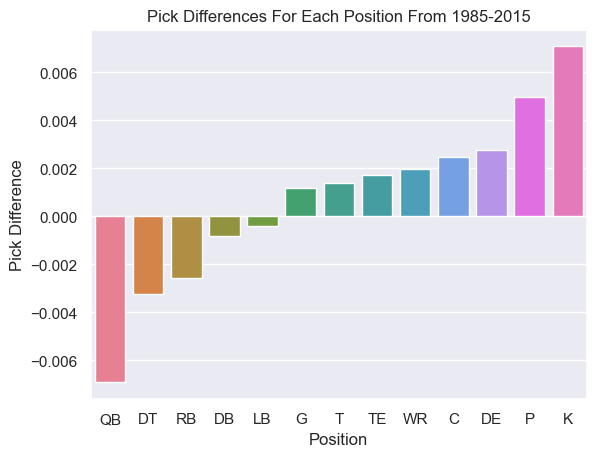

In [216]:
draft_stats['normalized_pick'] = 0.0

# Iterate over each year to calculate normalized picks
for year in draft_stats['year'].unique():
    yearly_data = draft_stats[draft_stats['year'] == year]
    total_picks = yearly_data['pick'].max()
    draft_stats.loc[draft_stats['year'] == year, 'normalized_pick'] = (
        (yearly_data['pick'] - 1) / (total_picks - 1)
    )

#Make a dictionary to store the results
average_pick_diff = {}

#Get unique positions from the dataset
positions = draft_stats['position_standard'].unique()

#Iterate through dataset and make new dataframes with pick differences
for position in positions:
    pos_data = draft_stats[draft_stats['position_standard'] == position]
    avg_pick_by_year = pos_data.groupby('year')['normalized_pick'].mean()
    pick_diff = avg_pick_by_year.diff()
    average_pick_diff[position] = pick_diff

diff_draft = pd.DataFrame(average_pick_diff)

#Melt the dataframe for the plotting process
melted_df = diff_draft.reset_index().melt(id_vars='year', var_name='position', value_name='pick_diff')
melted_draft_df = melted_df.dropna()
melted_draft_av = melted_draft_df.groupby('position')['pick_diff'].mean()
melted_draft_av = melted_draft_av.reset_index()

melted_draft_av_sorted = melted_draft_av.sort_values(by='pick_diff', ascending=True)
sns.barplot(x='position', y='pick_diff', hue='position', data=melted_draft_av_sorted)
plt.title('Pick Differences For Each Position From 1985-2015')
plt.xlabel('Position')
plt.ylabel('Pick Difference')

## Results

_I found that while QB had the highest frequency of being picked in the higher round, the pick which that position is drafted at has actually decreased from 1985 to 2015, which is contrary to what I thought as I believed that quarterback would be fairly stabile, though it does make sense since teams are less willing to risk putting their later picks into a quarterback who will likely not even be a starter._

_By this and many other findings by looking at the last boxplot, I can predict that generally speaking, teams will draft Kickers and Punters higher on average in the following years after 2015 and quarterbacks lower on average._

## Discussion and Conclusion

_From my results I found many surprising things, especially being that kickers and punters have actually been on the rise from 1985 to 2015. Some obstacles I ran into were the main one being that some positions don't have enough data, especially with special teams only having two or four players drafted on average in a given year. The other problem I ran into was the amount of picks changing throughout the years, which I was luckily able to fix by making a normalized pick variable, being a decimal percentage away from the first pick rather than a flat number. Something I would do different next time is find a dataset that includes more recent draft picks as 2015 is decently recent but something more recent could've shown results that wouldn't have been seen otherwise, so I would go up to at least 2022 next time. 

### References

Pedersen, Ulrik Thyge. “NFL Draft 1985-2015.” Kaggle, 2 Mar. 2023, www.kaggle.com/datasets/ulrikthygepedersen/nfl-draft-1985-2015. 

“Statistical Data Visualization#.” Seaborn, seaborn.pydata.org/index.html. Accessed 2 Dec. 2024. 